# Logistic Regression

28.0


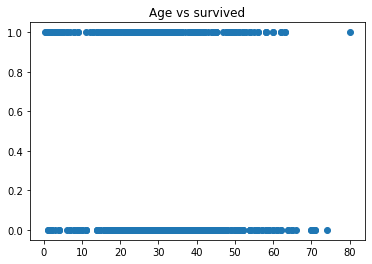

'\nplt.title(\'Pclass vs survived\')\nplt.scatter(titanic_train["Pclass"], titanic_train["Survived"])\nplt.show()\n\nplt.title(\'Sex vs survived\')\nplt.scatter(titanic_train["Sex"], titanic_train["Survived"])\nplt.show()\n'

In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from matplotlib import pyplot as plt

# 讀取資料
titanic_train = pd.read_csv('/content/drive/My Drive/Dataset/kaggle_titanic_train.csv')
#print(titanic_train)

# 將 Age 遺漏值以 median 填補
age_median = np.nanmedian(titanic_train["Age"])
print(age_median)
#print(titanic_train["Age"])
new_Age = np.where(titanic_train["Age"].isnull(), age_median, titanic_train["Age"])
#print(new_Age)
titanic_train["Age"] = new_Age

# 將Sex轉成數值 -> male, female to 0, 1
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_train["Sex"])
#print(titanic_train["Sex"])
#print(encoded_Sex)


plt.title('Age vs survived')
plt.scatter(titanic_train["Age"], titanic_train["Survived"])
plt.show()

'''
plt.title('Pclass vs survived')
plt.scatter(titanic_train["Pclass"], titanic_train["Survived"])
plt.show()

plt.title('Sex vs survived')
plt.scatter(titanic_train["Sex"], titanic_train["Survived"])
plt.show()
'''

In [8]:
# 建立 train_X
train_X = pd.DataFrame([titanic_train["Pclass"],
                        encoded_Sex,
                        titanic_train["Age"]
]).T
print(train_X.shape)



# 建立模型
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, titanic_train["Survived"])

# 計算準確率
accuracy = logistic_regr.score(train_X,titanic_train["Survived"])
print(accuracy)


(891, 3)
0.7878787878787878


In [9]:
# 測試
to_be_predicted = np.array([
    [1, 1, 20],
    [1, 1, 50],
    [1, 1, 80]
])
survived = logistic_regr.predict(to_be_predicted)
print(survived)

[1 0 0]
